In [1]:
import os
import cv2 as cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Creamos funcion para facilitar lectura de imagenes

In [2]:
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

### Ejemplos de imagenes en el dataset

In [11]:
img1 = img_read("pizza/1008104.jpg")
img2 = img_read("not_pizza/1043233.jpg")
img3 = img_read("pizza/102037.jpg")
img4 = img_read("not_pizza/1066151.jpg")

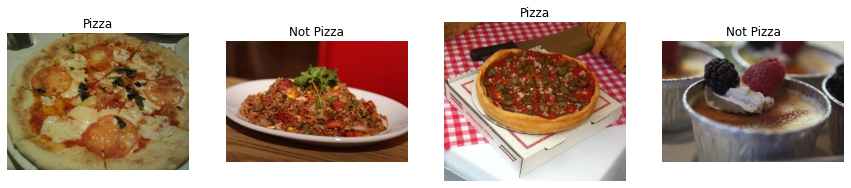

In [35]:
fig, ax = plt.subplots(1,4, figsize = (15,15))
ax[0].imshow(img1, cmap = "gray")
ax[0].set_axis_off()
ax[0].set_title("Pizza")

ax[1].imshow(img2, cmap = "gray")
ax[1].set_axis_off()
ax[1].set_title("Not Pizza")

ax[2].imshow(img3, cmap = "gray")
ax[2].set_axis_off()
ax[2].set_title("Pizza")

ax[3].imshow(img4, cmap = "gray")
ax[3].set_axis_off()
_ = ax[3].set_title("Not Pizza")

### Empezamos la etapa de procesamiento mirando diferentes canales para determinar cual nos permitirá trabajr el dataset de mejor manera. Utilizaremos imagenes que pertenezcan al dataset de pizza

#### Canal RGB

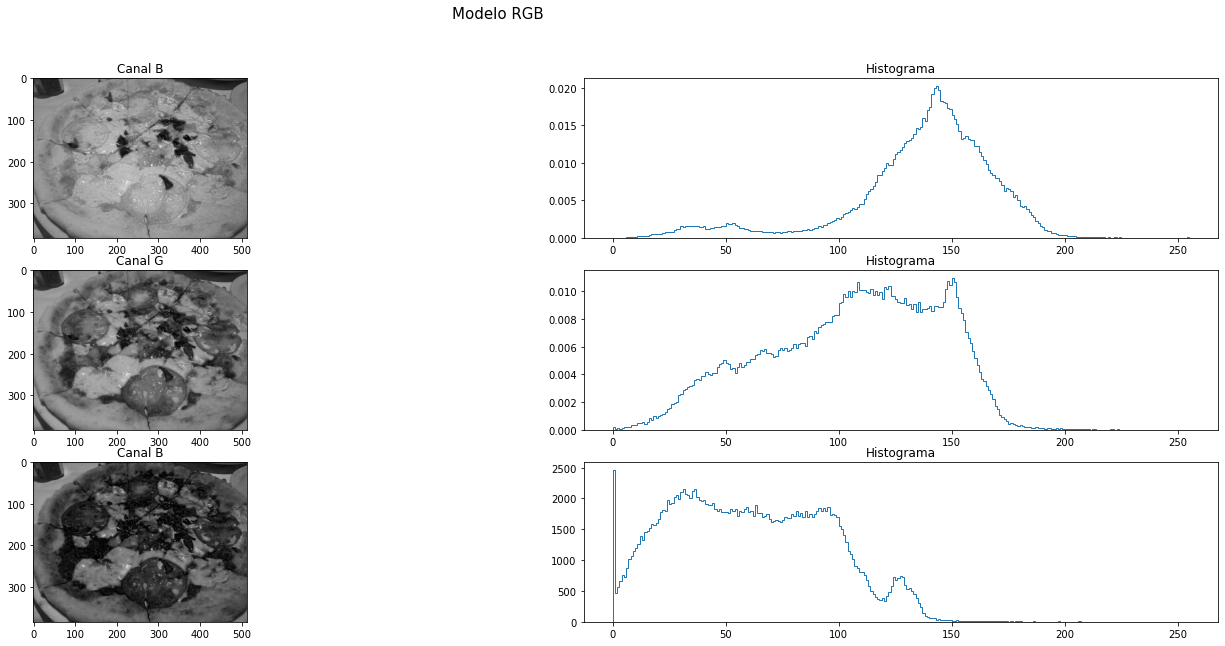

In [23]:
img_R_rgb = img1[:,:,0]
img_G_rgb = img1[:,:,1]
img_B_rgb = img1[:,:,2]

fig, arreglo_plots = plt.subplots(3,2, figsize=(25, 10))
fig.suptitle('Modelo RGB', fontsize=15)
arreglo_plots[(0,0)].set_title('Canal B')
arreglo_plots[(0,0)].imshow(img_R_rgb, cmap="gray")
arreglo_plots[(0,1)].set_title('Histograma')
img_array_1 = img_R_rgb.ravel()
_=arreglo_plots[(0,1)].hist(img_array_1,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(1,0)].set_title('Canal G')
arreglo_plots[(1,0)].imshow(img_G_rgb, cmap="gray")
arreglo_plots[(1,1)].set_title('Histograma')
img_array_2 = img_G_rgb.ravel()
arreglo_plots[(1,1)].hist(img_array_2,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(2,0)].set_title('Canal B')
arreglo_plots[(2,0)].imshow(img_B_rgb, cmap="gray")
arreglo_plots[(2,1)].set_title('Histograma')
img_array_3 = img_B_rgb.ravel()
_=arreglo_plots[(2,1)].hist(img_array_3,histtype='step', bins=255,range=(0.0, 255.0))

#### Canal LAB

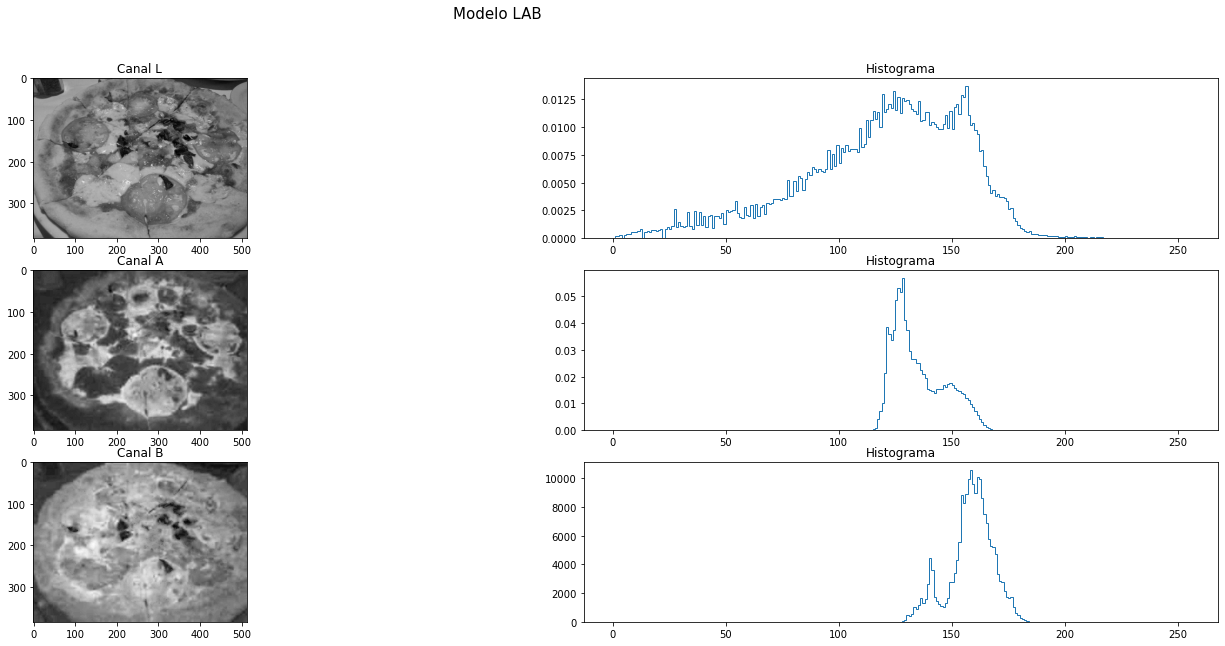

In [24]:
img_lab  = cv2.cvtColor(img1, cv2.COLOR_RGB2LAB)
img_L_lab = img_lab[:,:,0]
img_A_lab =  img_lab[:,:,1]
img_B_lab = img_lab[:,:,2]


fig, arreglo_plots = plt.subplots(3,2, figsize=(25, 10))
fig.suptitle('Modelo LAB', fontsize=15)
arreglo_plots[(0,0)].set_title('Canal L')
arreglo_plots[(0,0)].imshow(img_L_lab, cmap="gray")
arreglo_plots[(0,1)].set_title('Histograma')
img_array_1 = img_L_lab.ravel()
_=arreglo_plots[(0,1)].hist(img_array_1,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(1,0)].set_title('Canal A')
arreglo_plots[(1,0)].imshow(img_A_lab, cmap="gray")
arreglo_plots[(1,1)].set_title('Histograma')
img_array_2 = img_A_lab.ravel()
arreglo_plots[(1,1)].hist(img_array_2,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(2,0)].set_title('Canal B')
arreglo_plots[(2,0)].imshow(img_B_lab, cmap="gray")
arreglo_plots[(2,1)].set_title('Histograma')
img_array_3 = img_B_lab.ravel()
_=arreglo_plots[(2,1)].hist(img_array_3,histtype='step', bins=255,range=(0.0, 255.0))

#### Canal HSV

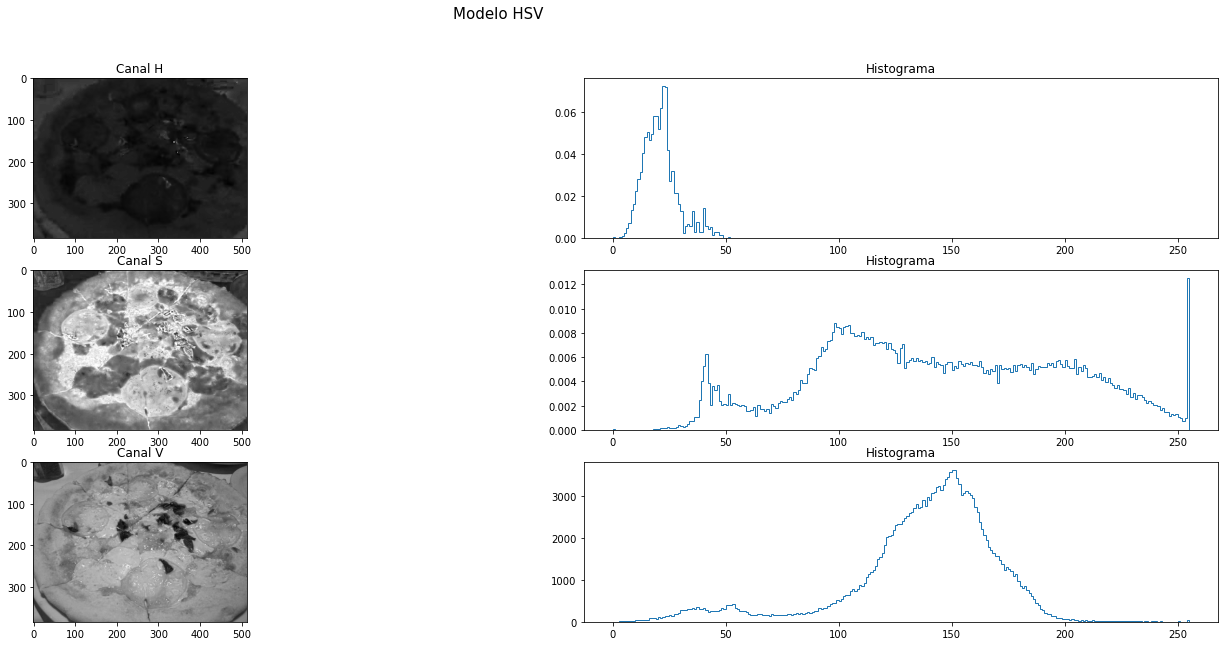

In [25]:
img_hsv  = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
img_H_hsv = img_hsv[:,:,0]
img_S_hsv =  img_hsv[:,:,1]
img_V_hsv = img_hsv[:,:,2]

fig, arreglo_plots = plt.subplots(3,2, figsize=(25, 10))
fig.suptitle('Modelo HSV', fontsize=15)
arreglo_plots[(0,0)].set_title('Canal H')
arreglo_plots[(0,0)].imshow(img_H_hsv, cmap="gray")
arreglo_plots[(0,1)].set_title('Histograma')
img_array_1 = img_H_hsv.ravel()
_=arreglo_plots[(0,1)].hist(img_array_1,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(1,0)].set_title('Canal S')
arreglo_plots[(1,0)].imshow(img_S_hsv, cmap="gray")
arreglo_plots[(1,1)].set_title('Histograma')
img_array_2 = img_S_hsv.ravel()
arreglo_plots[(1,1)].hist(img_array_2,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(2,0)].set_title('Canal V')
arreglo_plots[(2,0)].imshow(img_V_hsv, cmap="gray")
arreglo_plots[(2,1)].set_title('Histograma')
img_array_3 = img_V_hsv.ravel()
_=arreglo_plots[(2,1)].hist(img_array_3,histtype='step', bins=255,range=(0.0, 255.0))

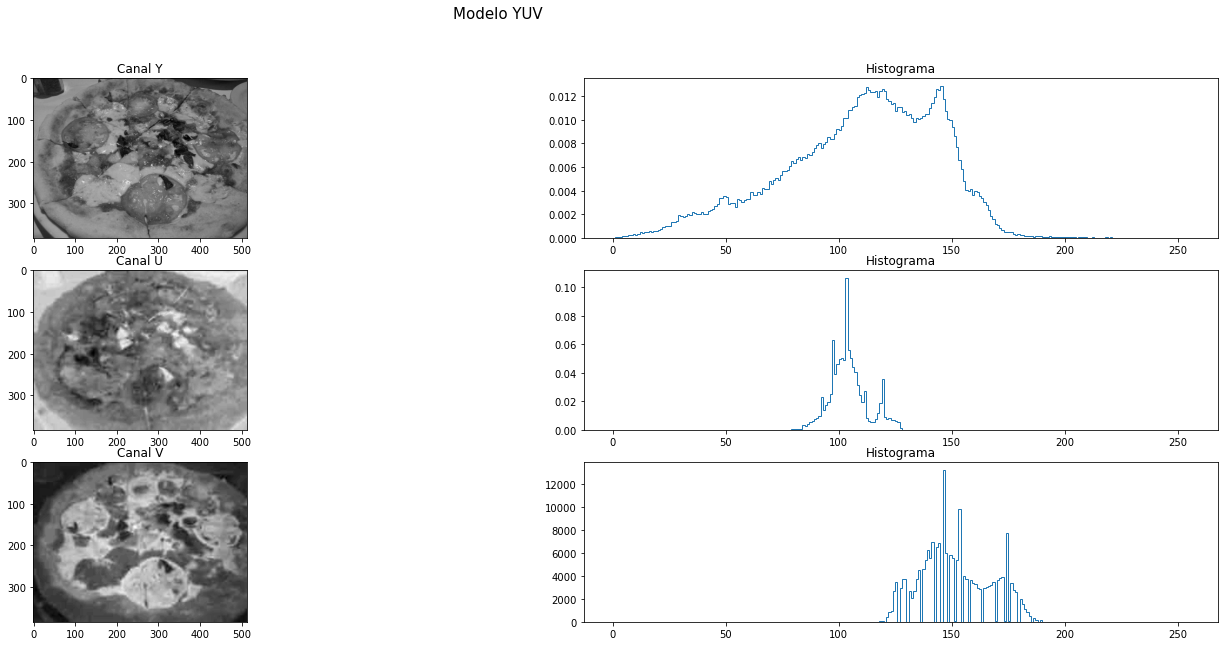

In [26]:
# Modelo YUV

img_yuv  = cv2.cvtColor(img1, cv2.COLOR_RGB2YUV)
img_Y_yuv = img_yuv[:,:,0]
img_U_yuv =  img_yuv[:,:,1]
img_V_yuv = img_yuv[:,:,2]


fig, arreglo_plots = plt.subplots(3,2, figsize=(25, 10))
fig.suptitle('Modelo YUV', fontsize=15)
arreglo_plots[(0,0)].set_title('Canal Y')
arreglo_plots[(0,0)].imshow(img_Y_yuv, cmap="gray")
arreglo_plots[(0,1)].set_title('Histograma')
img_array_1 = img_Y_yuv.ravel()
_=arreglo_plots[(0,1)].hist(img_array_1,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(1,0)].set_title('Canal U')
arreglo_plots[(1,0)].imshow(img_U_yuv, cmap="gray")
arreglo_plots[(1,1)].set_title('Histograma')
img_array_2 = img_U_yuv.ravel()
arreglo_plots[(1,1)].hist(img_array_2,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(2,0)].set_title('Canal V')
arreglo_plots[(2,0)].imshow(img_V_yuv, cmap="gray")
arreglo_plots[(2,1)].set_title('Histograma')
img_array_3 = img_V_yuv.ravel()
_=arreglo_plots[(2,1)].hist(img_array_3,histtype='step', bins=255,range=(0.0, 255.0))

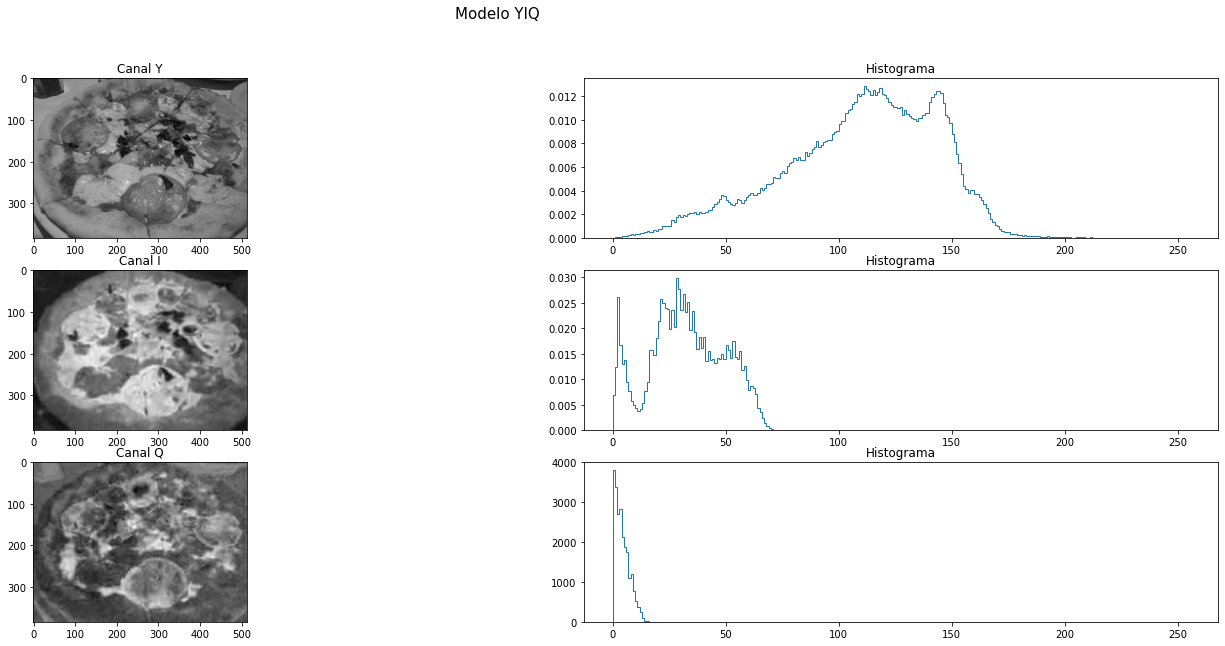

In [28]:
# Modelo YIQ

img_R = img1[:,:,0]
img_G = img1[:,:,1]
img_B = img1[:,:,2]

img_Y_yiq = 0.299*img_R + 0.587*img_G + 0.114*img_B
img_I_yiq = 0.596*img_R - 0.274*img_G - 0.322*img_B
img_Q_yiq = 0.211*img_R - 0.523*img_G + 0.312*img_B

fig, arreglo_plots = plt.subplots(3,2, figsize=(25, 10))
fig.suptitle('Modelo YIQ', fontsize=15)
arreglo_plots[(0,0)].set_title('Canal Y')
arreglo_plots[(0,0)].imshow(img_Y_yiq, cmap="gray")
arreglo_plots[(0,1)].set_title('Histograma')
img_array_1 = img_Y_yiq.ravel()
_=arreglo_plots[(0,1)].hist(img_array_1,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(1,0)].set_title('Canal I')
arreglo_plots[(1,0)].imshow(img_I_yiq, cmap="gray")
arreglo_plots[(1,1)].set_title('Histograma')
img_array_2 = img_I_yiq.ravel()
arreglo_plots[(1,1)].hist(img_array_2,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(2,0)].set_title('Canal Q')
arreglo_plots[(2,0)].imshow(img_Q_yiq, cmap="gray")
arreglo_plots[(2,1)].set_title('Histograma')
img_array_3 = img_Q_yiq.ravel()
_=arreglo_plots[(2,1)].hist(img_array_3,histtype='step', bins=255,range=(0.0, 255.0))

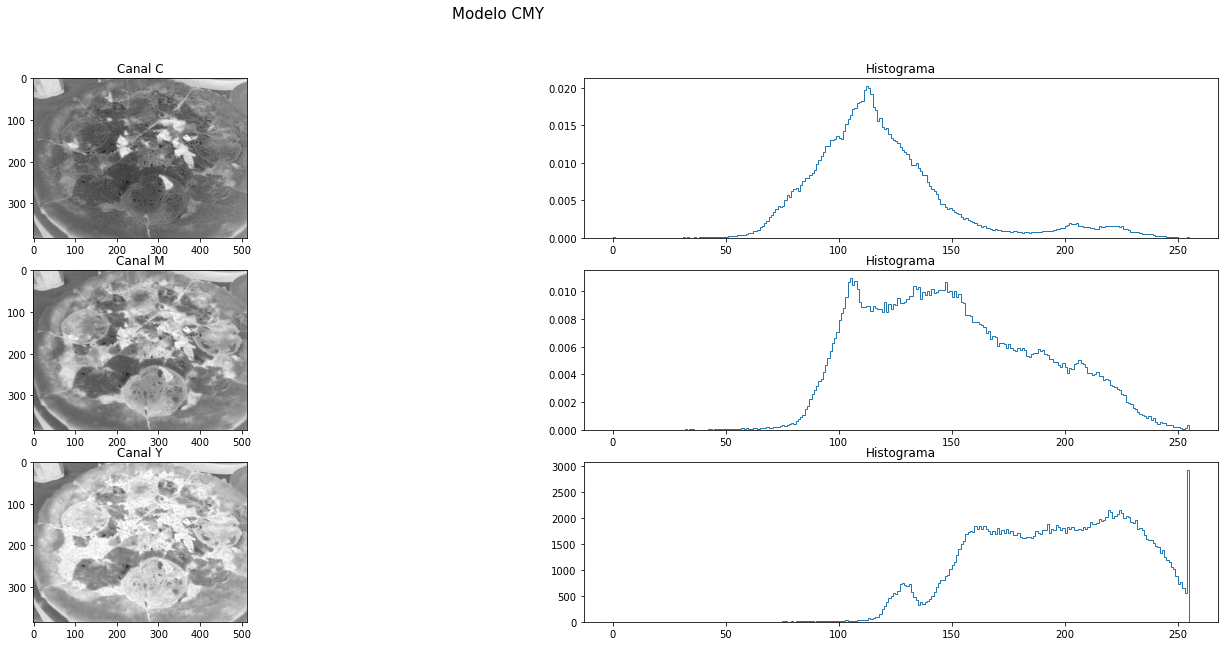

In [29]:
# Modelo CMY

img_C_cmy = 255 - img1[:,:,0]
img_M_cmy = 255 - img1[:,:,1]
img_Y_cmy = 255 - img1[:,:,2]

img_CMY=img_C_cmy+img_M_cmy+img_Y_cmy

fig, arreglo_plots = plt.subplots(3,2, figsize=(25, 10))
fig.suptitle('Modelo CMY', fontsize=15)
arreglo_plots[(0,0)].set_title('Canal C')
arreglo_plots[(0,0)].imshow(img_C_cmy, cmap="gray")
arreglo_plots[(0,1)].set_title('Histograma')
img_array_1 = img_C_cmy.ravel()
_=arreglo_plots[(0,1)].hist(img_array_1,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(1,0)].set_title('Canal M')
arreglo_plots[(1,0)].imshow(img_M_cmy, cmap="gray")
arreglo_plots[(1,1)].set_title('Histograma')
img_array_2 = img_M_cmy.ravel()
arreglo_plots[(1,1)].hist(img_array_2,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True)

arreglo_plots[(2,0)].set_title('Canal Y')
arreglo_plots[(2,0)].imshow(img_Y_cmy, cmap="gray")
arreglo_plots[(2,1)].set_title('Histograma')
img_array_3 = img_Y_cmy.ravel()
_=arreglo_plots[(2,1)].hist(img_array_3,histtype='step', bins=255,range=(0.0, 255.0))